# **HEART DISEASE ANALYSIS** 

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [7]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
# !brew install libomp

In [10]:
data = pd.read_csv('heart.csv')

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
#data.info()

### **Missing Value Detection**

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Missing Value Detection**

In [16]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


# Visualization 

In [17]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


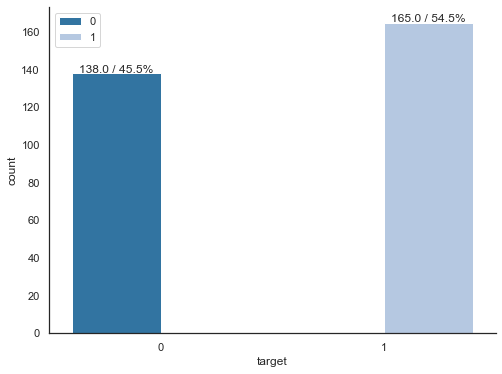

In [18]:
total_cnt = data['target'].count()
plt.figure(figsize=(8,6))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='target',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

In [19]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [20]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

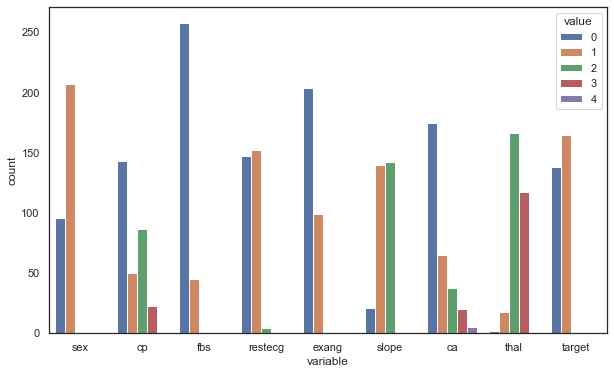

In [21]:
plt.figure(figsize=(10,6))
dataframe_categorical = data.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

sex=[1 = male, 0 = female]
chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]
Fasting Blood Sugar=[1 = true, 0 = false]
Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]
Exercise induced Angina =[1 = yes; 0 = no]
Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]
=[0=,1=,2=,3=,4=]
=[0=,1=,2=,3=]
=[0=,1=]


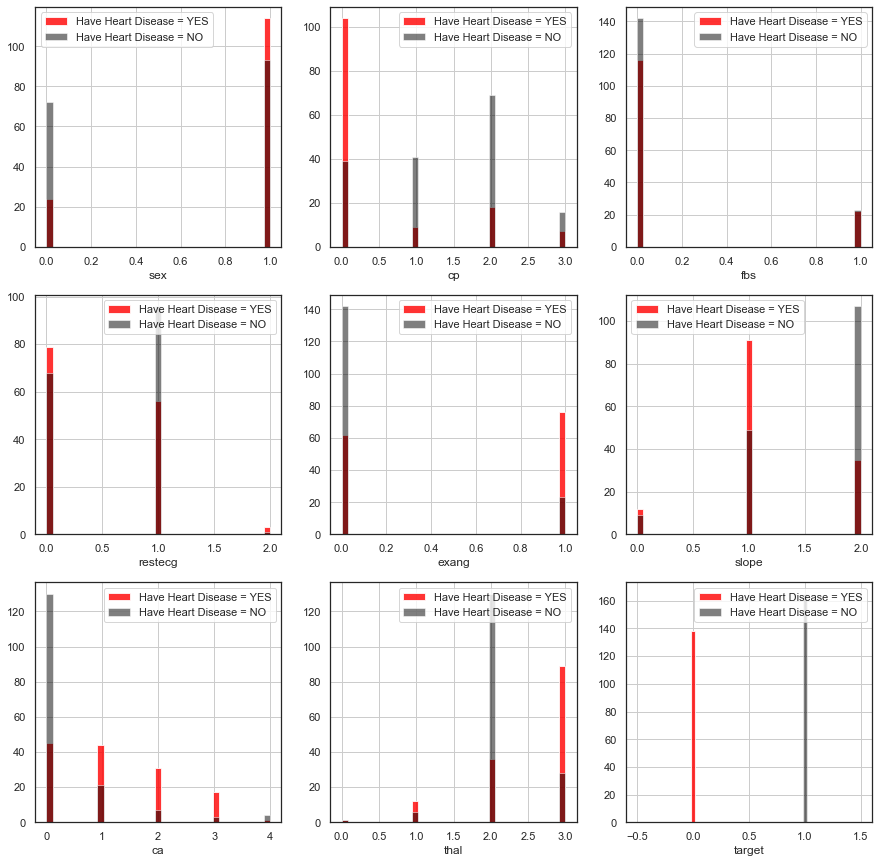

In [22]:
plt.figure(figsize=(15, 15))
print ("sex=[1 = male, 0 = female]")
print ("chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]")
print ("Fasting Blood Sugar=[1 = true, 0 = false]")
print ("Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]")
print ("Exercise induced Angina =[1 = yes; 0 = no]")
print ("Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]")
print ("=[0=,1=,2=,3=,4=]")
print ("=[0=,1=,2=,3=]")
print ("=[0=,1=]")
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    data[data["target"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.5)
    plt.legend()
    plt.xlabel(column)

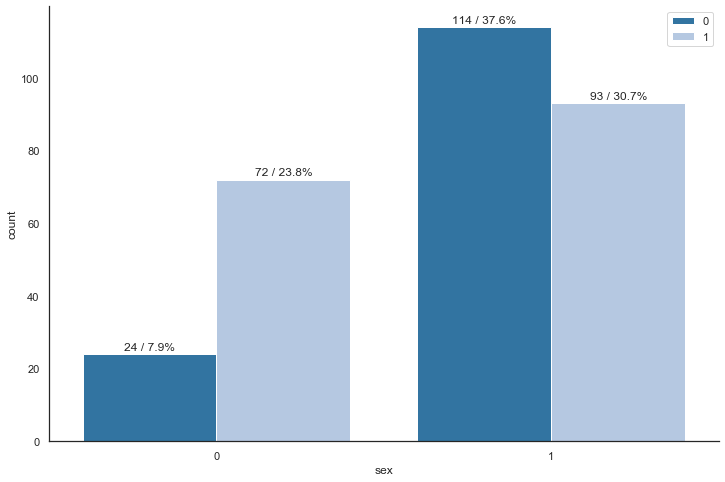

In [23]:
total_cnt = data['target'].count()
plt.figure(figsize=(12,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='sex',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

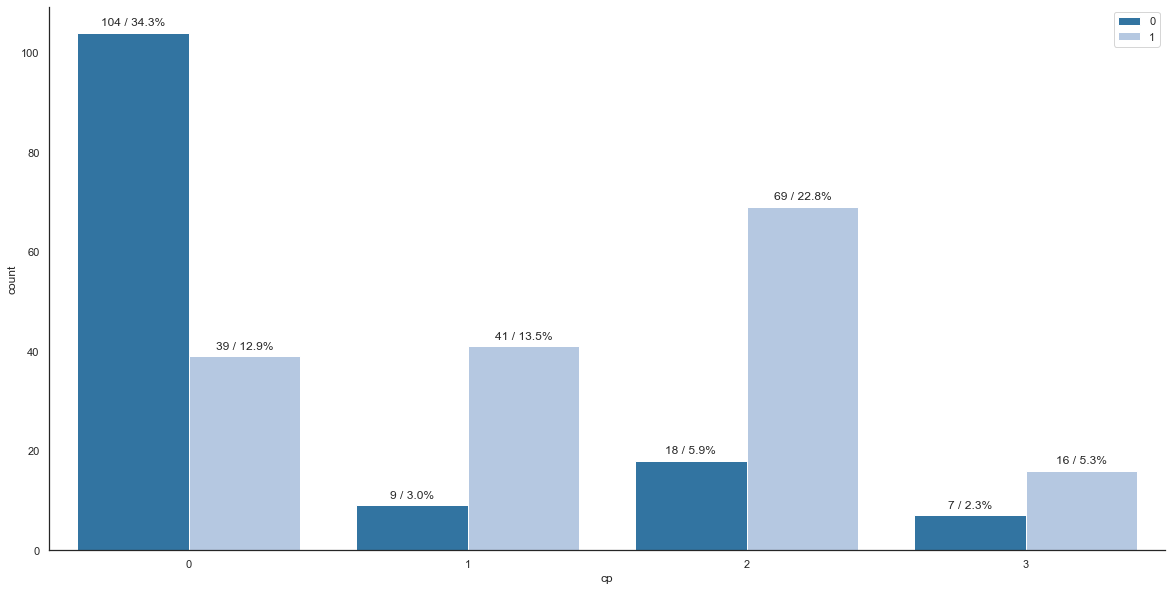

In [24]:
total_cnt = data['target'].count()
plt.figure(figsize=(20,10))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='cp',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

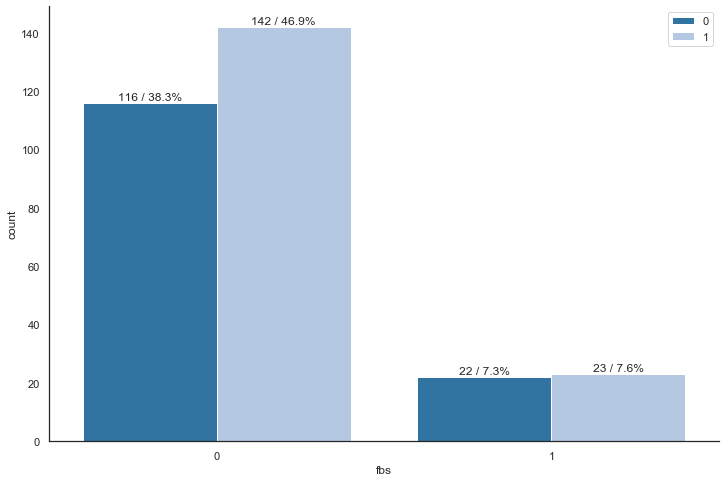

In [25]:
total_cnt = data['target'].count()
plt.figure(figsize=(12,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='fbs',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

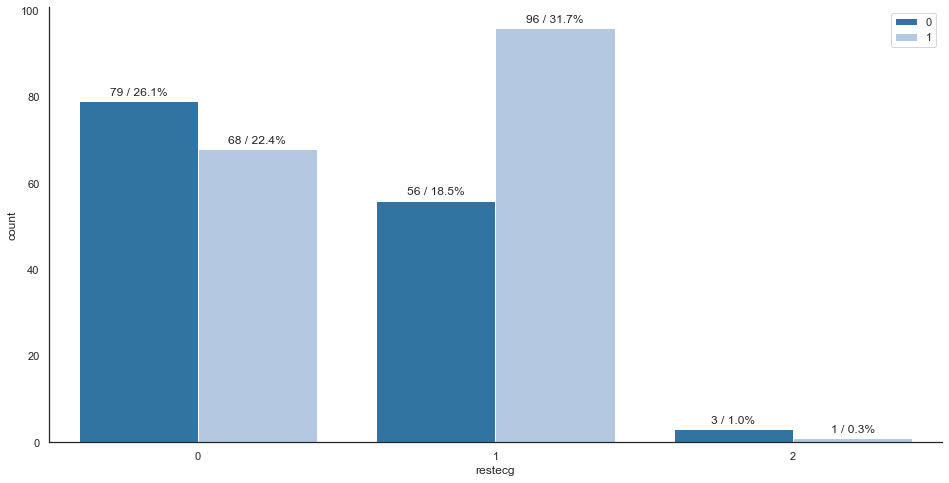

In [26]:
total_cnt = data['target'].count()
plt.figure(figsize=(16,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='restecg',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

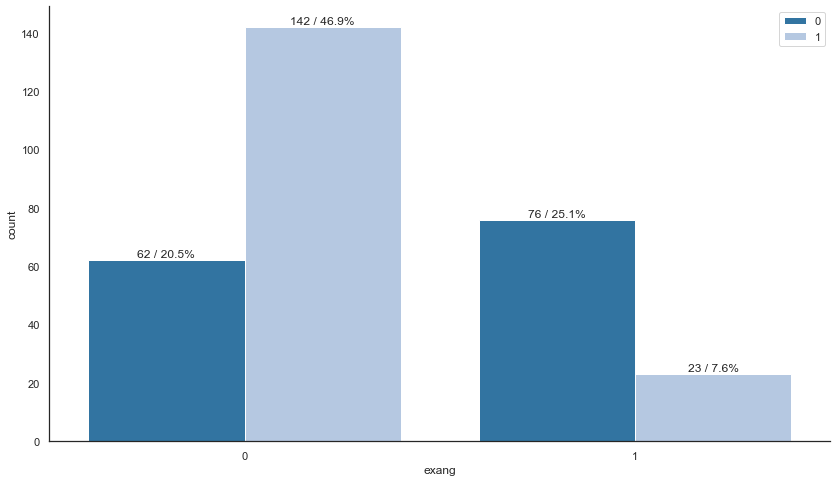

In [27]:
total_cnt = data['target'].count()
plt.figure(figsize=(14,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='exang',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

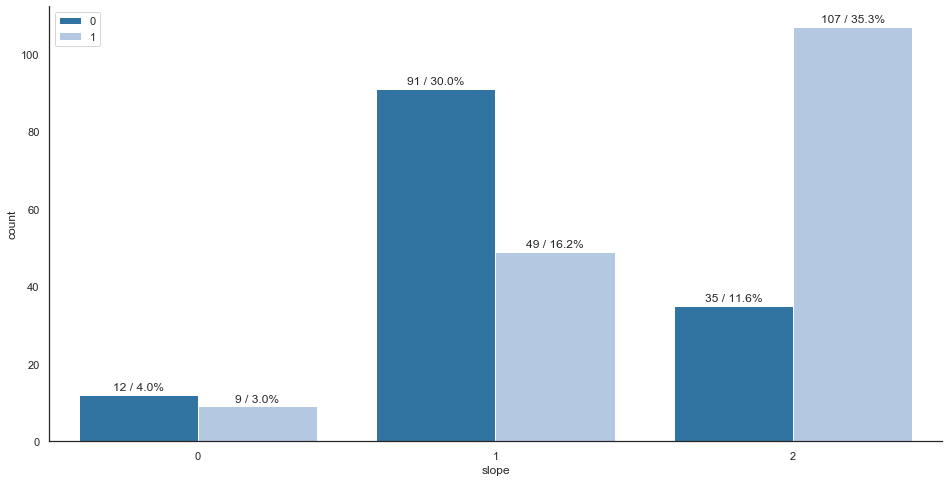

In [28]:
total_cnt = data['target'].count()
plt.figure(figsize=(16,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='slope',hue='target', palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

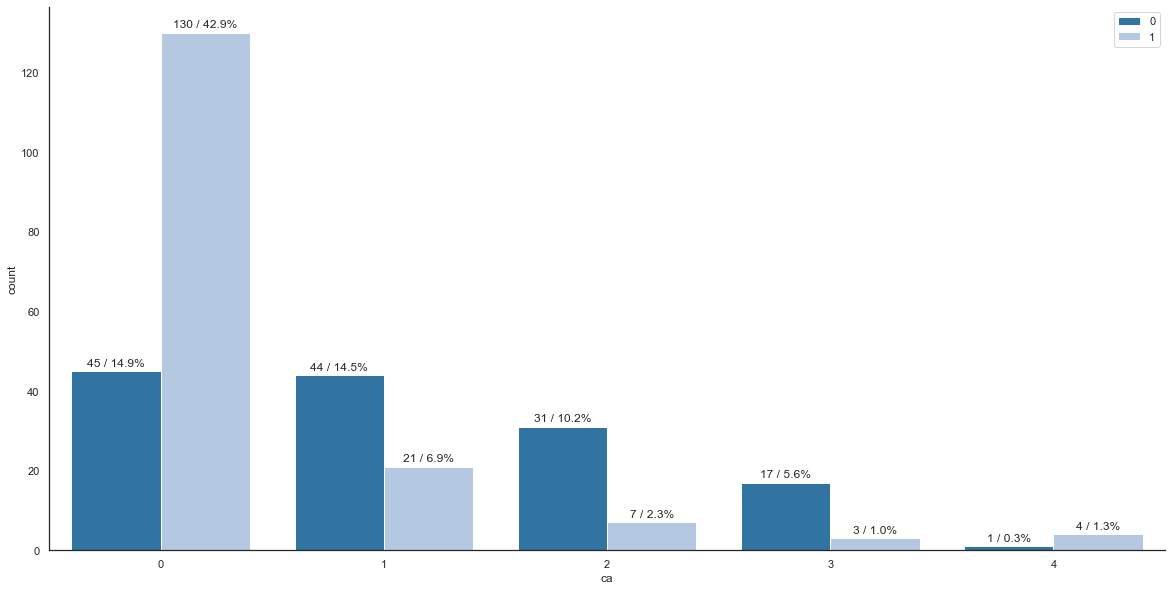

In [29]:
total_cnt = data['target'].count()
plt.figure(figsize=(20,10))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x= 'ca', hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

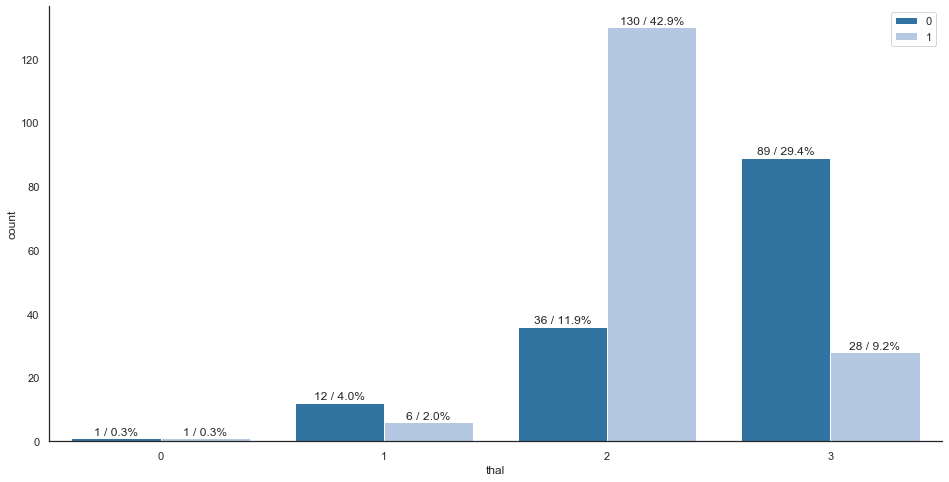

In [30]:
total_cnt = data['target'].count()
plt.figure(figsize=(16,8))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x= 'thal',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


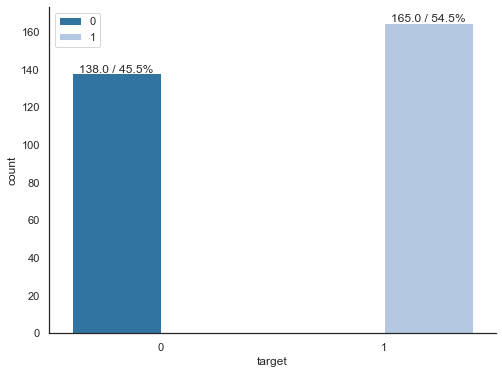

In [31]:
total_cnt = data['target'].count()
plt.figure(figsize=(8,6))
sns.set(font_scale = 1)
sns.set_style("white")
ax = sns.countplot(data=data, x='target',hue='target',palette='tab20')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
plt.legend(labels=None)
sns.despine()

In [32]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

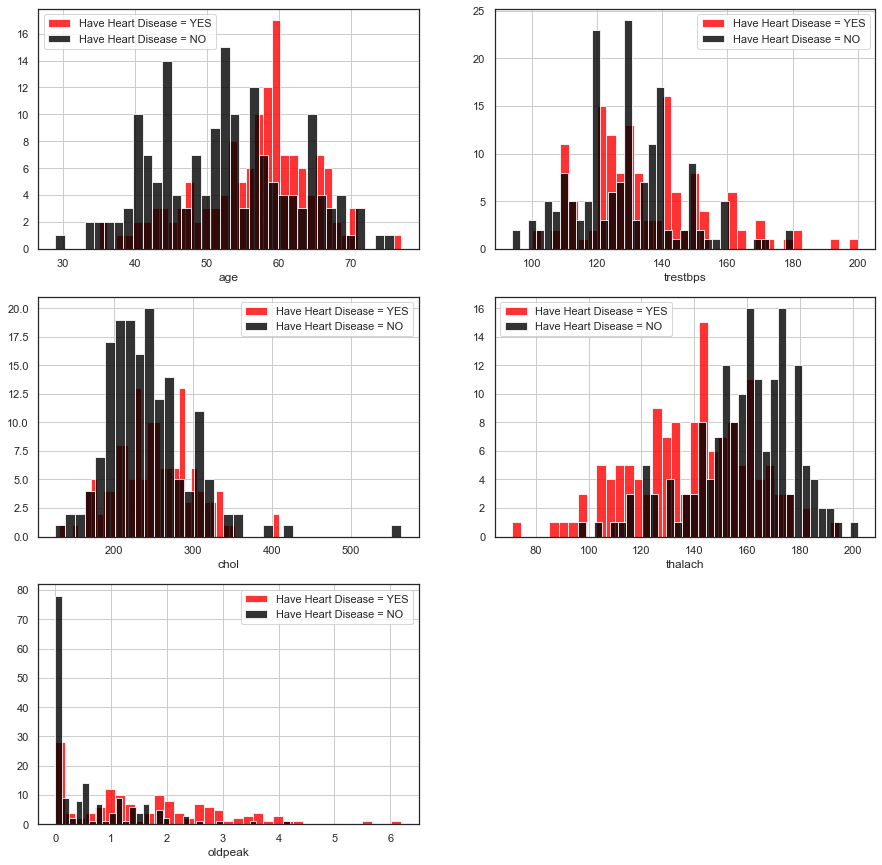

In [33]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    data[data["target"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.8)
    plt.legend()
    plt.xlabel(column)

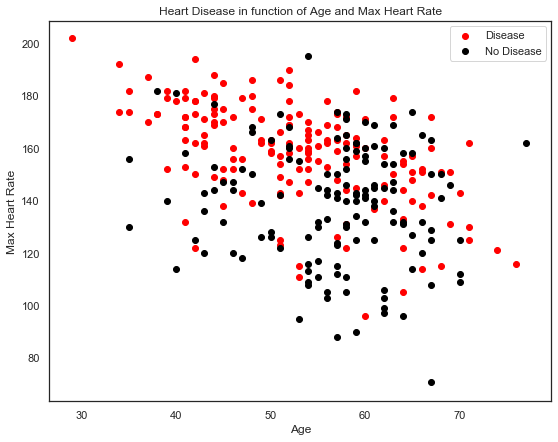

In [34]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="black")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

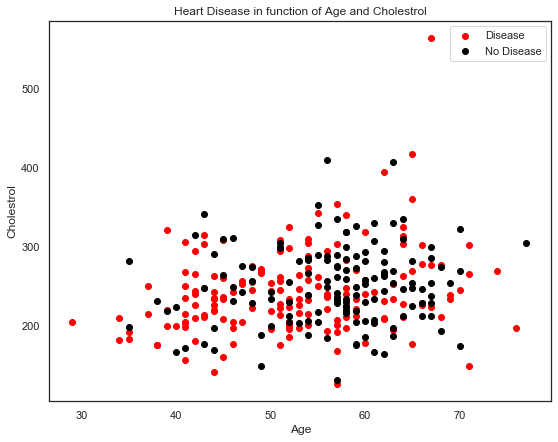

In [35]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.chol[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.chol[data.target==0],
            c="black")

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.legend(["Disease", "No Disease"]);

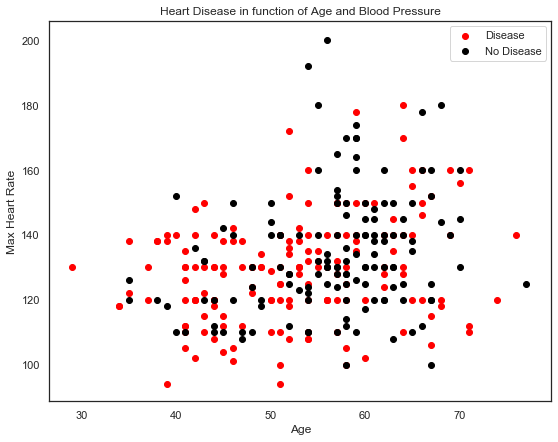

In [36]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.trestbps[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.trestbps[data.target==0],
            c="black")

# Add some helpful info
plt.title("Heart Disease in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

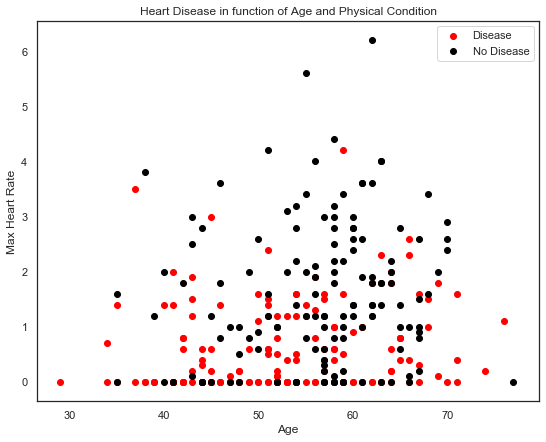

In [37]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.oldpeak[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.oldpeak[data.target==0],
            c="black")

# Add some helpful info
plt.title("Heart Disease in function of Age and Physical Condition")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [38]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


(14.5, -0.5)

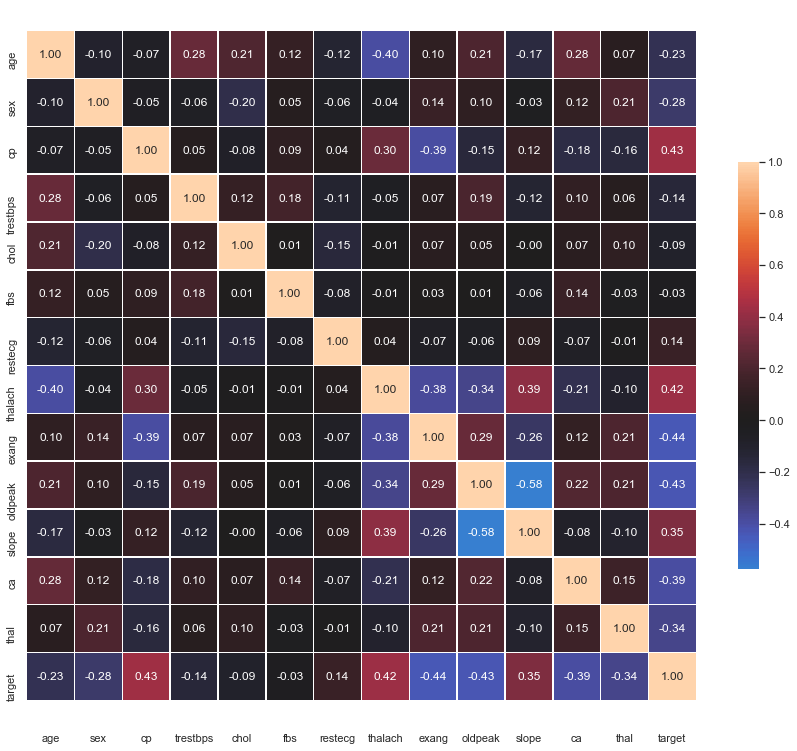

In [39]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, center=0, square=True, linewidths=.5, fmt=".2f", annot=True, cbar_kws={"shrink": .5});

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [40]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [41]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.20,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.20,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.40,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.20,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [42]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


# Data Transform into StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [44]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0.48,-0.10,-1.17,-0.72,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.03,-1.23,0.34,-0.77,0.14,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.50,0.71,-1.03,-0.38,2.04,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.29,-0.09,-2.23,-1.52,0.14,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


## **Model prepration**

In [45]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.85      0.87       0.87          0.87
recall      0.83   0.90      0.87       0.87          0.87
f1-score    0.86   0.88      0.87       0.87          0.87
support   101.00 111.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 84  17]
 [ 11 100]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.92  0.93      0.92       0.92          0.92
recall     0.89  0.94      0.92       0.92          0.92
f1-score   0.90  0.94      0.92       0.92          0.92
support   37.00 54.00      0.92      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[33  4]
 [ 3 51]]



# Confusion Matrix

<Figure size 432x432 with 0 Axes>

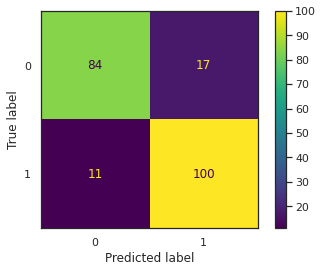

In [38]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_train, y_train)  
plt.show()


<Figure size 432x432 with 0 Axes>

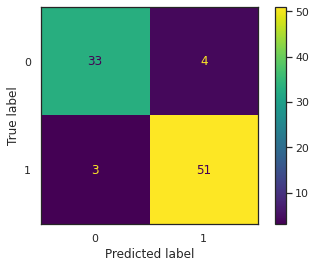

In [39]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_test, y_test) 

plt.show()

# Roc Curve 

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9669669669669669

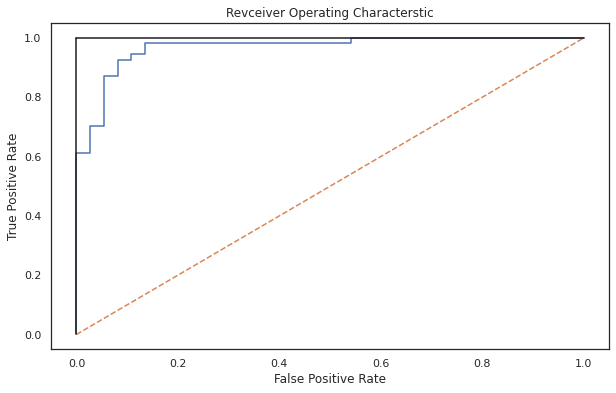

In [41]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,92.31


## 2. K-nearest neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, p=1)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.86      0.87       0.87          0.87
recall      0.84   0.89      0.87       0.87          0.87
f1-score    0.86   0.88      0.87       0.87          0.87
support   101.00 111.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[85 16]
 [12 99]]

Test Result:
Accuracy Score: 91.21%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.89  0.93      0.91       0.91          0.91
recall     0.89  0.93      0.91       0.91          0.91
f1-score   0.89  0.93      0.91       0.91          0.91
support   37.00 54.00      0.91      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[33  4]
 [ 4 50]]



# Confusion Matrix

<Figure size 432x432 with 0 Axes>

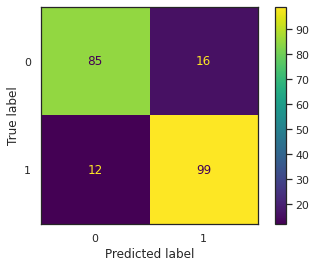

In [44]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

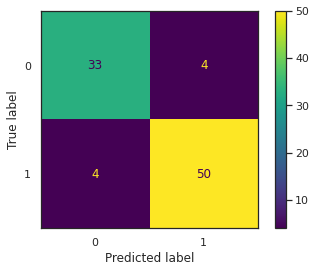

In [45]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_test, y_test) 

plt.show()

# Roc Curve 

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9542042042042043

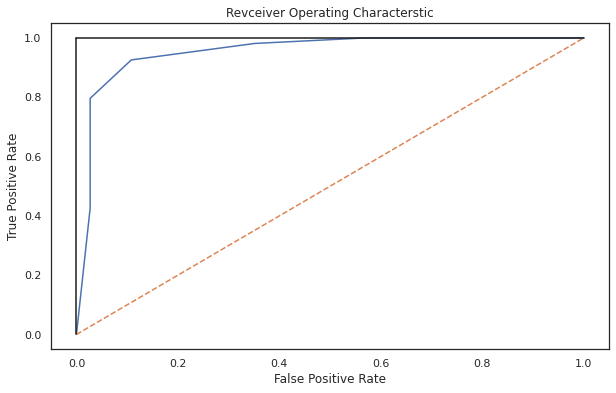

In [47]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [48]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,92.31
1,K-nearest neighbors,86.79,91.21


## 3. Support Vector machine

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(gamma=0.1, C=1.0,probability=True, max_iter=-1)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.98%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.92   0.92      0.92       0.92          0.92
recall      0.91   0.93      0.92       0.92          0.92
f1-score    0.92   0.92      0.92       0.92          0.92
support   101.00 111.00      0.92     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 92   9]
 [  8 103]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.89  0.94      0.92       0.92          0.92
recall     0.92  0.93      0.92       0.92          0.92
f1-score   0.91  0.93      0.92       0.92          0.92
support   37.00 54.00      0.92      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  3]
 [ 4 50]]



# Confusion Matrix

<Figure size 432x432 with 0 Axes>

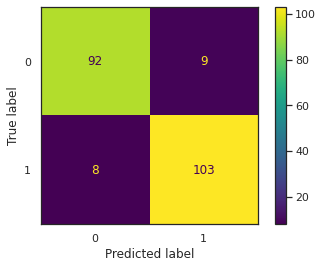

In [50]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

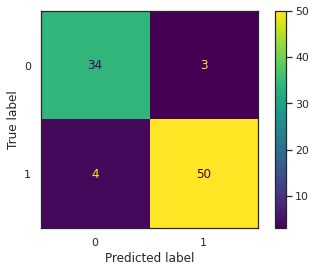

In [51]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9574574574574575

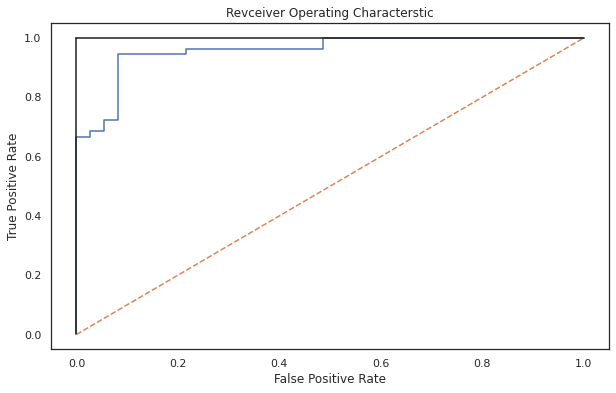

In [53]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [54]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,92.31
1,K-nearest neighbors,86.79,91.21
2,Support Vector Machine,91.98,92.31


## 4. Decision Tree Classifier 

In [55]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=120, min_impurity_decrease=0.01)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.84      0.86       0.87          0.87
recall      0.81   0.91      0.86       0.86          0.86
f1-score    0.85   0.87      0.86       0.86          0.86
support   101.00 111.00      0.86     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  19]
 [ 10 101]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.86  0.91      0.89       0.89          0.89
recall     0.86  0.91      0.89       0.89          0.89
f1-score   0.86  0.91      0.89       0.89          0.89
support   37.00 54.00      0.89      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[32  5]
 [ 5 49]]



# Confusion Matrix

<Figure size 432x432 with 0 Axes>

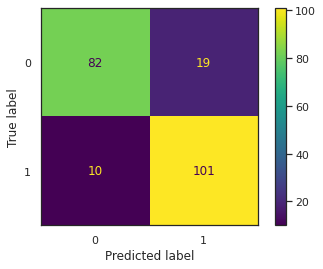

In [56]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(tree_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

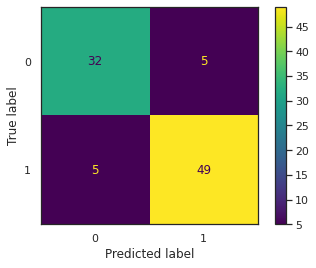

In [57]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(tree_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8688688688688688

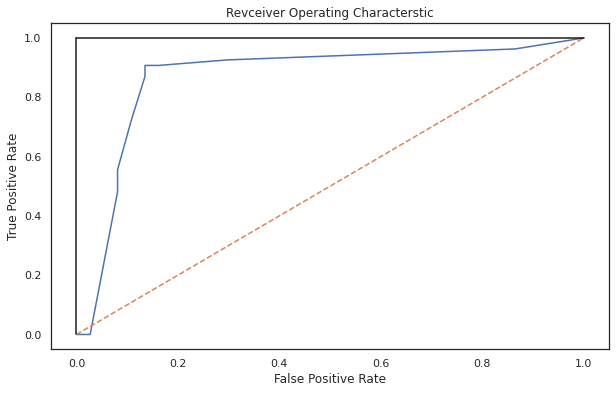

In [59]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [60]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,92.31
1,K-nearest neighbors,86.79,91.21
2,Support Vector Machine,91.98,92.31
3,Decision Tree Classifier,86.32,89.01


## 5. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=120, random_state=120)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   101.00 111.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[101   0]
 [  0 111]]

Test Result:
Accuracy Score: 91.21%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.91  0.91      0.91       0.91          0.91
recall     0.86  0.94      0.91       0.90          0.91
f1-score   0.89  0.93      0.91       0.91          0.91
support   37.00 54.00      0.91      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[32  5]
 [ 3 51]]



# Confusion Matrix

<Figure size 432x432 with 0 Axes>

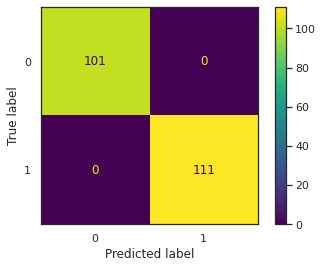

In [62]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

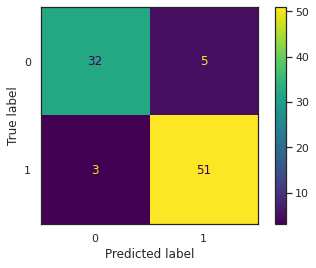

In [63]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9559559559559558

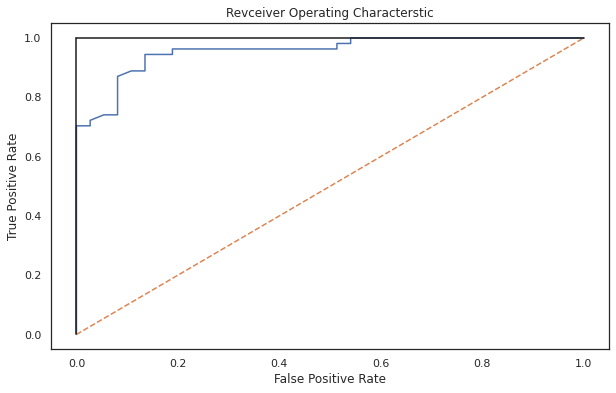

In [65]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [66]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,92.31
1,K-nearest neighbors,86.79,91.21
2,Support Vector Machine,91.98,92.31
3,Decision Tree Classifier,86.32,89.01
4,Random Forest Classifier,100.00,91.21


## 6. XGBoost Classifer

In [48]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_jobs=-1,n_estimators=12, random_state=42)
xgb_clf.fit(X_train, y_train)

# print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

[10:45:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=12, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Confusion Matrix

<Figure size 432x432 with 0 Axes>

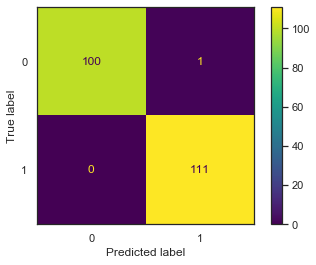

In [49]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(xgb_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

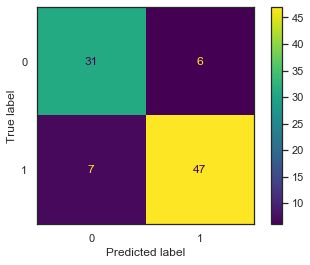

In [50]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(xgb_clf, X_test, y_test) 
plt.show()

In [56]:
# save the model to disk
import pickle

filename = 'heart_Disease_XGB.h5'
pickle.dump(xgb_clf, open(filename, 'wb'))


# Roc Curve

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.924924924924925

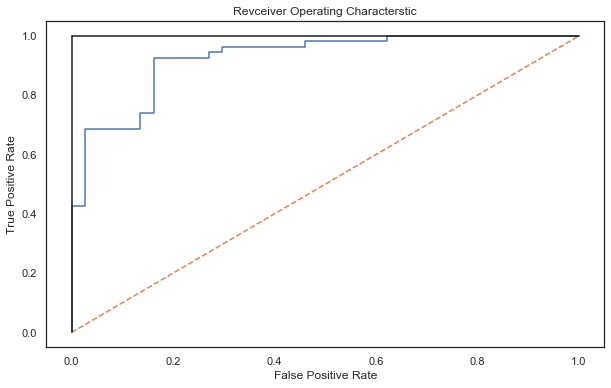

In [52]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

NameError: name 'results_df' is not defined

# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

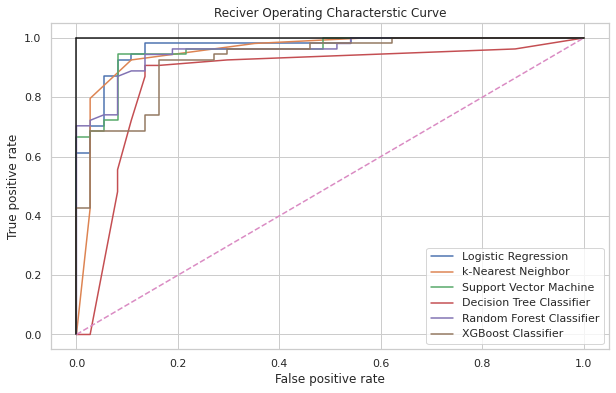

In [73]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,label='Logistic Regression')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,label='k-Nearest Neighbor')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,label='Support Vector Machine')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,label='Decision Tree Classifier')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,label='Random Forest Classifier')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,label='XGBoost Classifier')

plt.plot([0,1],ls='--',)
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()